In [114]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [115]:
data = pd.read_csv('/content/train.csv')

In [116]:
data.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


In [117]:
data.shape

(850, 15)

In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  850 non-null    int64  
 1   pclass        850 non-null    int64  
 2   name          850 non-null    object 
 3   sex           850 non-null    object 
 4   age           676 non-null    float64
 5   sibsp         850 non-null    int64  
 6   parch         850 non-null    int64  
 7   ticket        850 non-null    object 
 8   fare          849 non-null    float64
 9   cabin         191 non-null    object 
 10  embarked      849 non-null    object 
 11  boat          308 non-null    object 
 12  body          73 non-null     float64
 13  home.dest     464 non-null    object 
 14  survived      850 non-null    int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 99.7+ KB


In [119]:
data.isnull().sum()

,0
passenger_id,0
pclass,0
name,0
sex,0
age,174
sibsp,0
parch,0
ticket,0
fare,1
cabin,659


In [120]:
data.duplicated().sum()

0

In [121]:
data.drop(columns=['ticket','cabin','embarked','home.dest'], inplace=True)

In [122]:
data.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,fare,boat,body,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,7.7333,13,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,8.6625,NaN,NaN,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,24.1500,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,23.0000,4,NaN,1
4,576,2,"Veal, Mr. James",male,40.0,0,0,13.0000,NaN,NaN,0


In [123]:
data.drop(columns=['boat','body'], inplace=True)

In [124]:
data.drop(columns=['passenger_id','name'], inplace=True)

In [125]:
data.head()

,pclass,sex,age,sibsp,parch,fare,survived
0,3,female,NaN,0,0,7.7333,1
1,3,male,38.0,0,0,8.6625,0
2,3,female,30.0,1,1,24.1500,0
3,2,female,54.0,1,3,23.0000,1
4,2,male,40.0,0,0,13.0000,0


In [126]:
data.shape

(850, 7)

In [127]:
data.isnull().sum()

,0
pclass,0
sex,0
age,174
sibsp,0
parch,0
fare,1
survived,0


In [128]:
data.dropna(subset=["fare"], inplace=True)

In [129]:
data.isnull().sum()

,0
pclass,0
sex,0
age,174
sibsp,0
parch,0
fare,0
survived,0


In [130]:
data.fillna(data.age.mean(), inplace=True)

In [131]:
data.isnull().sum()

,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
survived,0


In [132]:
import seaborn as sns

In [133]:
from sklearn.preprocessing import OneHotEncoder

In [134]:
data.head()

,pclass,sex,age,sibsp,parch,fare,survived
0,3,female,29.473951,0,0,7.7333,1
1,3,male,38.000000,0,0,8.6625,0
2,3,female,30.000000,1,1,24.1500,0
3,2,female,54.000000,1,3,23.0000,1
4,2,male,40.000000,0,0,13.0000,0


In [135]:
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

In [136]:
encoder = OneHotEncoder(sparse_output=False)

In [137]:
one_hot_encoded = encoder.fit_transform(data[categorical_columns])

In [138]:
one_hot_df = pd.DataFrame(one_hot_encoded, columns= encoder.get_feature_names_out(categorical_columns))

In [139]:
one_hot_df = pd.concat([data, one_hot_df], axis=1)

In [140]:
data = one_hot_df.drop(categorical_columns, axis=1)

In [141]:
data.head()

,pclass,age,sibsp,parch,fare,survived,sex_female,sex_male
0,3.0,29.473951,0.0,0.0,7.7333,1.0,1.0,0.0
1,3.0,38.000000,0.0,0.0,8.6625,0.0,0.0,1.0
2,3.0,30.000000,1.0,1.0,24.1500,0.0,1.0,0.0
3,2.0,54.000000,1.0,3.0,23.0000,1.0,1.0,0.0
4,2.0,40.000000,0.0,0.0,13.0000,0.0,0.0,1.0


In [142]:
data.shape

(850, 8)

In [143]:
data.isnull().sum()

,0
pclass,1
age,1
sibsp,1
parch,1
fare,1
survived,1
sex_female,1
sex_male,1


In [144]:
data.dropna(subset=['pclass',	'age',	'sibsp',	'parch',	'fare',	'survived',	'sex_female',	'sex_male'], inplace=True)

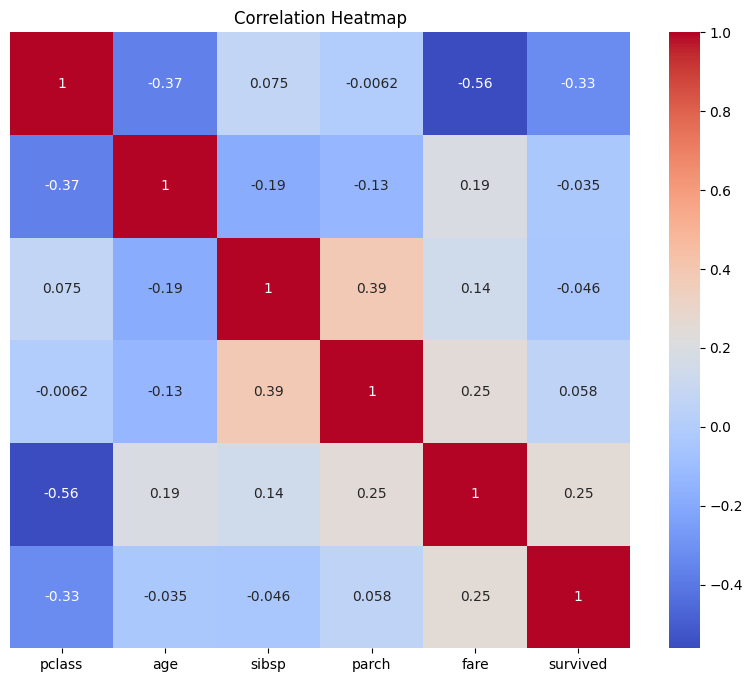

In [145]:
data1 = [	'pclass',	'age',	'sibsp',	'parch',	'fare',	'survived']
plt.figure(figsize=(10,8))
corr = data[data1].corr()
sns.heatmap(corr, annot=True, yticklabels=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

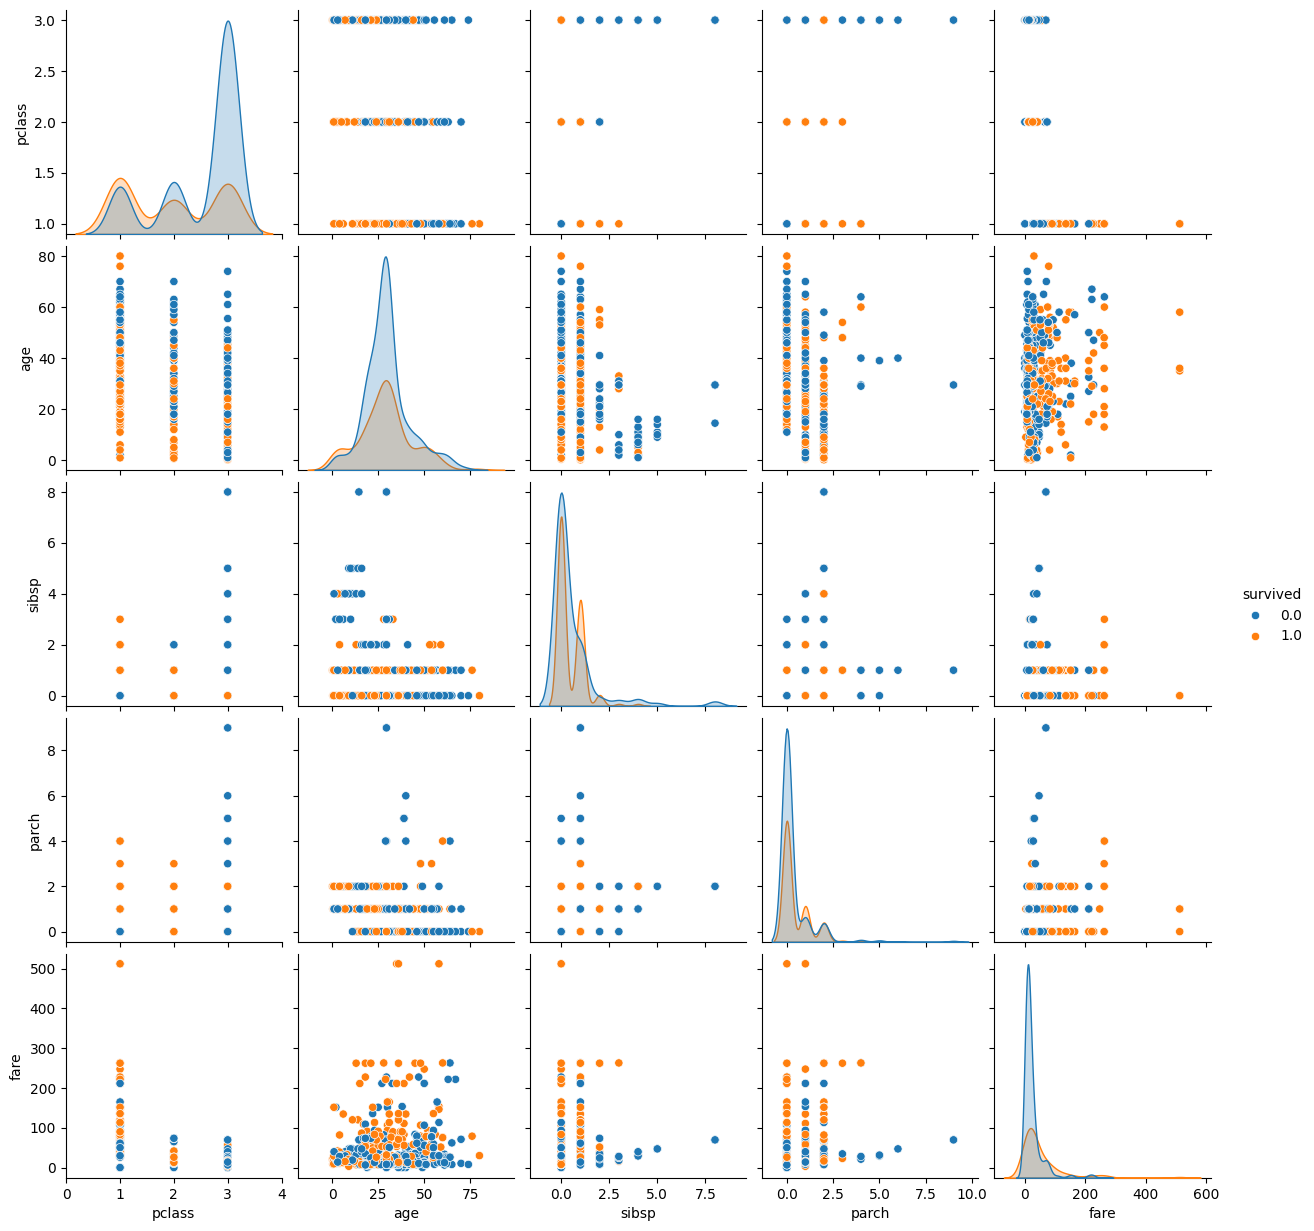

In [146]:
sns.pairplot(data, vars=['pclass','age', 'sibsp', 'parch', 'fare'], hue='survived')
plt.show()

In [147]:
from sklearn.model_selection import train_test_split

In [148]:
from sklearn.linear_model import LogisticRegression

In [149]:
x = data.drop('survived', axis=1)
y = data.survived

In [150]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [151]:
LR = LogisticRegression()

In [152]:
LR.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [153]:
predict = LR.predict(x_test)
predict

array([1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0.,
       1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.])

In [154]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predict)

0.711764705882353